In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("E:/Data Science/Datasets/NLP/spam.csv", encoding = 'ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 2',	'Unnamed: 3','Unnamed: 4'], axis = 1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.columns = ['labels', 'mails']
df

,labels,mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.labels = df.labels.map({'ham' : 0,
                          'spam' : 1})

df

,labels,mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [8]:
vec = CountVectorizer(decode_error = 'ignore')
X = vec.fit_transform(df.mails)

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [9]:
Y = df.labels

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state = 101, test_size = 0.2)

In [13]:
model = MultinomialNB()
model.fit(xtrain, ytrain)

print('Train model score ::', model.score(xtrain, ytrain).round(4))
print('Test model score ::', model.score(xtest, ytest).round(4))

Train model score :: 0.9937
Test model score :: 0.9848


In [14]:
tf = TfidfVectorizer()
A = tf.fit_transform(df.mails)

In [15]:
B = df.labels

In [16]:
atrain, atest, btrain, btest = train_test_split(A, B, random_state = 101, test_size = 0.2)

In [17]:
model = MultinomialNB()
model.fit(atrain, btrain)

print('Train model score ::', model.score(atrain, btrain).round(4))
print('Test model score ::', model.score(atest, btest).round(4))

Train model score :: 0.9693
Test model score :: 0.9614


In [29]:
import matplotlib.pyplot as plt

def visual(label):
    words = ''
    for msg in df[df.labels == label]['mails']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width = 600, height = 500).generate(words)
    plt.figure(figsize = (20,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

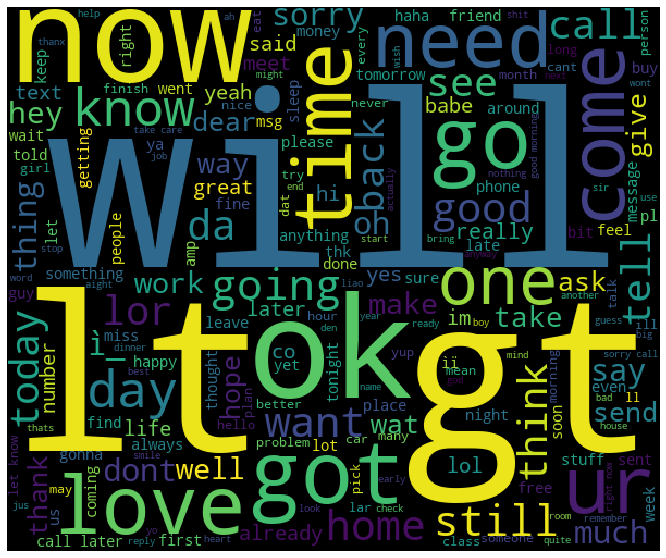

In [30]:
visual(0)

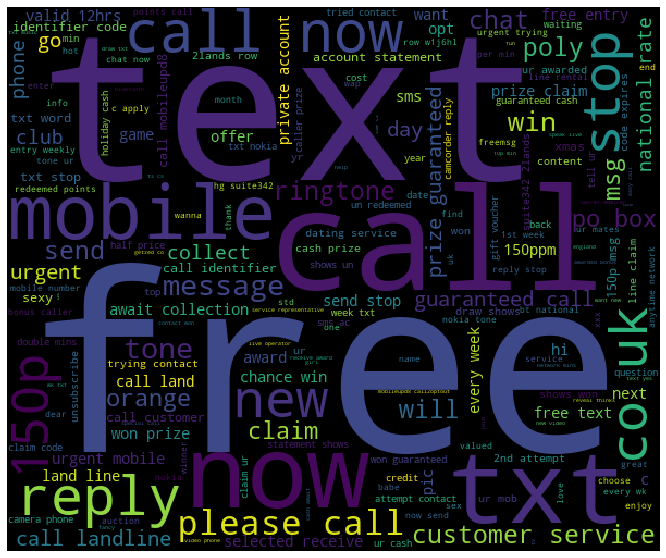

In [31]:
visual(1)

In [32]:
df['predictions'] = model.predict(X)
df

,labels,mails,predictions
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,1
5568,0,Will Ì_ b going to esplanade fr home?,0
5569,0,"Pity, * was in mood for that. So...any other s...",0
5570,0,The guy did some bitching but I acted like i'd...,0


In [33]:
df.labels = df.labels.map({0 : 'ham',
                          1 :'spam'})

df

,labels,mails,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [35]:
sneaky_spam = df[(df.predictions == 0) & (df.labels == 'spam')]['mails']
sneaky_spam                 

5       FreeMsg Hey there darling it's been 3 week's n...
34      Thanks for your subscription to Ringtone UK yo...
68      Did you hear about the new \Divorce Barbie\"? ...
138     You'll not rcv any more msgs from the chat svc...
164     BangBabes Ur order is on the way. U SHOULD rec...
                              ...                        
5377    The current leading bid is 151. To pause this ...
5381           You have 1 new message. Call 0207-083-6089
5427    Santa Calling! Would your little ones like a c...
5492    Marvel Mobile Play the official Ultimate Spide...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
Name: mails, Length: 132, dtype: object

In [36]:
not_spam = df[(df.predictions == 1) & (df.labels == 'ham')]['mails']
not_spam 

1289    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
1500                   Host-based IDPS for linux systems.
2317    Waqt se pehle or naseeb se zyada kisi ko kuch ...
2569             Ultimately tor motive tui achieve korli.
4380               Mathews or tait or edwards or anderson
4860                               Nokia phone is lovly..
Name: mails, dtype: object